#**Airbnb in NYC: Characteristics of a Good Listing**

###By Jessica Guo (jqg214), Spencer Libbing (stl327) and Harry Wu (zw1869)

###Data Bootcamp Final Group Project


## Topic:
Airbnb is an online vacation rental marketplace that that took its company public on December 10th, 2020 in one of the most highly anticipated IPOs of 2020. Through the service, users can arrange lodging and tourism experiences or list their properties for rental. Airbnb does not own any of the listed properties but instead profits by receiving commission from each booking. 

Our project seeks to use listing data for Airbnb properties in NYC in 2019, as found on 'NY_Listings.csv' from https://www.kaggle.com/samyukthamurali/airbnb-ratings-dataset. We aim to determine what characteristics make for the best Airbnb listing to help future hosts optimize where and how they list they properties.

### Themes:

What can we learn about different hosts and areas?

What can we learn from predictions? (ex: locations, prices, reviews, etc)

Which hosts are the busiest and why?

Is there any noticeable difference of traffic among different areas and what could be the reason for it?





In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
%matplotlib inline

In [ ]:
data = pd.read_csv('NY_Listings.csv', encoding='latin-1')
data.dropna()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,19,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Street,City,Neighbourhood cleansed,State,Country,latitude,longitude,Property type,Room type,Accommodates,Bathrooms,Bedrooms,Amenities,Price,Minimum nights,Maximum nights,Availability 365,Calendar last scraped,Number of reviews,Last Review Date,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
0,2515,Sunny Private Room,16286162,Pat,1.0,False,4.0,Bronx| NY| United States,Bronx,Allerton,NY,United States,40.866889,-73.857756,House,Private room,1.0,1.0,1.0,Cable TV;Internet;Wireless Internet;Kitchen;Fr...,43,2,30.0,276,10/2/17,66,8/25/17,96,10,9,10,10,9,10,1.77
1,2539,Comfy bedroom minutes to Manhattan,44260966,Alicia,1.0,False,1.0,Bronx| NY| United States,Bronx,Soundview,NY,United States,40.829392,-73.865137,House,Private room,1.0,1.0,1.0,TV;Internet;Wireless Internet;Air conditioning...,28,2,31.0,345,10/2/17,38,9/8/17,89,10,9,9,10,9,9,1.54
2,2595,Spacious RM in Private Home; Backyard/Near Metro,105394139,Ciprian,1.0,False,16.0,Bronx| NY| United States,Bronx,Fordham,NY,United States,40.869139,-73.895096,House,Private room,4.0,3.0,2.0,Internet;Wireless Internet;Air conditioning;Ki...,80,3,31.0,355,10/2/17,18,9/4/17,90,9,9,10,9,9,9,3.83
3,3330,Modern Bronx Treasure!,104262517,Felicia,0.7,False,1.0,Bronx | NY| United States,Bronx,Fordham,NY,United States,40.868719,-73.891438,Apartment,Entire home/apt,4.0,1.0,1.0,TV;Internet;Wireless Internet;Air conditioning...,140,2,1125.0,358,10/2/17,7,4/23/17,85,9,10,8,9,9,9,0.67
4,3647,Good Vibes Sanctuary,58126473,Miriam,1.0,False,1.0,Bronx| NY| United States,Bronx,Fordham,NY,United States,40.863628,-73.894787,Apartment,Private room,2.0,1.0,1.0,TV;Wireless Internet;Air conditioning;Kitchen;...,60,1,1125.0,360,10/3/17,56,9/20/17,95,10,10,10,10,9,10,3.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44301,21176357,Studio apartment in NYC,5949541,Helen,1.0,True,1.0,Staten Island| NY| United States,Staten Island,Grant City,NY,United States,40.580231,-74.107252,House,Entire home/apt,3.0,1.0,1.0,Cable TV;Wireless Internet;Air conditioning;Fr...,80,3,27.0,107,10/3/17,18,9/15/17,99,10,10,10,10,9,10,3.44
44303,21176433,Glorious Mornings Townhouse,2265022,K. Zovia,1.0,False,1.0,Staten Island| NY| United States,Staten Island,Mariners Harbor,NY,United States,40.627257,-74.158796,Apartment,Entire home/apt,6.0,2.0,3.0,TV;Cable TV;Internet;Wireless Internet;Air con...,150,5,1125.0,345,10/3/17,11,9/15/17,95,9,9,10,10,9,10,0.40
44305,21177066,1-Bdrm Entire Apartment St. George,6319915,Jason,1.0,False,2.0,Staten Island| NY| United States,Staten Island,St. George,NY,United States,40.645665,-74.083677,Apartment,Entire home/apt,2.0,1.0,1.0,TV;Cable TV;Internet;Wireless Internet;Air con...,70,4,30.0,45,10/2/17,56,9/28/17,100,10,10,10,10,10,10,2.25
44306,21177156,2Br Private Penthouse Loft.Near Ferry! WaterVi...,1715301,Marc,1.0,True,2.0,Staten Island| NY| United States,Staten Island,St. George,NY,United States,40.639576,-74.075257,House,Entire home/apt,6.0,1.0,2.0,TV;Internet;Wireless Internet;Air conditioning...,95,4,1125.0,89,10/2/17,27,9/18/17,98,10,10,10,10,10,10,4.76


## Borough Specific Data

In [ ]:
data['City'].value_counts()

Manhattan        34375
Brooklyn         30323
Queens            8816
Bronx             1703
Staten Island      532
Name: City, dtype: int64

In [ ]:
value_counts = data['City'].value_counts().rename_axis('Borough').reset_index(name='Listing counts')
value_counts

,Borough,Listing counts
0,Manhattan,34375
1,Brooklyn,30323
2,Queens,8816
3,Bronx,1703
4,Staten Island,532


Text(0.5, 1.0, 'Proportion of Listings by Borough')

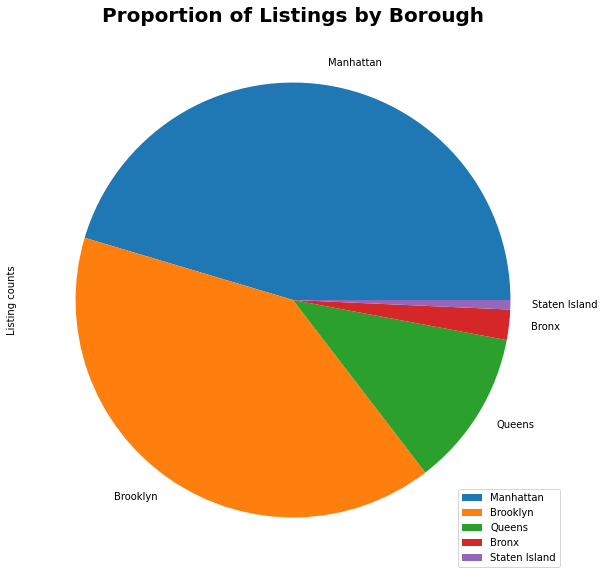

In [ ]:
fig,ax = plt.subplots()
value_counts.set_index(['Borough']).plot.pie(ax=ax, y='Listing counts',figsize=(10,10))
ax.set_title('Proportion of Listings by Borough', size = 20, fontweight = 'bold')

In [ ]:
cities = data.groupby('City')['Price','Review Scores Rating','Review Scores Location',
                              'Number of reviews'].mean().sort_values('Price',ascending = False)
cities

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Price,Review Scores Rating,Review Scores Location,Number of reviews
City,,,,
Manhattan,204.686865,45.915113,4.360785,16.031302
Brooklyn,118.774561,44.352010,4.378755,16.299739
Staten Island,103.862782,38.817669,3.789474,20.541353
Queens,98.211093,35.617287,3.554673,19.466198
Bronx,86.840869,32.928362,3.154433,16.869055


Text(0, 0.5, 'NYC Borough')

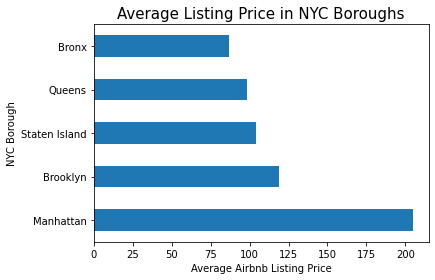

In [ ]:
fig,ax=plt.subplots()

cities['Price'].plot.barh(ax=ax,figsize=(6,4))

ax.set_title('Average Listing Price in NYC Boroughs',size=15)
ax.set_xlabel('Average Airbnb Listing Price')
ax.set_ylabel('NYC Borough')

In [ ]:
manhattan = data.loc[data['City']=='Manhattan', :]
manhattan

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Street,City,Neighbourhood cleansed,State,Country,latitude,longitude,Property type,Room type,Accommodates,Bathrooms,Bedrooms,Amenities,Price,Minimum nights,Maximum nights,Availability 365,Calendar last scraped,Number of reviews,Last Review Date,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
19284,10084117,NaN,6676776,Peter,NaN,False,1.0,New York| NY| United States,Manhattan,Battery Park City,NY,United States,40.712387,-74.016196,Apartment,Entire home/apt,2.0,1.0,1.0,Carbon monoxide detector,400,1000,1125.0,362,10/3/17,0,NaN,0,0,0,0,0,0,0,0.0
19285,10084168,Gorgeous 1 Bdrm NYC- 1-2 years Rent,21282574,Suki,0.75,False,1.0,New York| NY| United States,Manhattan,Battery Park City,NY,United States,40.707200,-74.016939,Apartment,Entire home/apt,2.0,1.0,1.0,TV;Cable TV;Internet;Wireless Internet;Air con...,270,1,1125.0,363,10/3/17,0,NaN,0,0,0,0,0,0,0,0.0
19286,10084380,World Trade Center; Status Of Liberty; Wall St...,104179322,Yili,NaN,False,1.0,New York| NY| United States,Manhattan,Battery Park City,NY,United States,40.707334,-74.016711,Condominium,Entire home/apt,4.0,1.0,1.0,TV;Wireless Internet;Air conditioning;Pool;Kit...,580,1,30.0,0,10/2/17,0,NaN,0,0,0,0,0,0,0,0.0
19287,10084382,Loft Like Studio in Luxury Building,14861483,Brian,NaN,False,1.0,New York| NY| United States,Manhattan,Battery Park City,NY,United States,40.716201,-74.015651,Apartment,Entire home/apt,2.0,1.0,1.0,TV;Cable TV;Internet;Wireless Internet;Air con...,325,1,1125.0,0,10/2/17,0,NaN,0,0,0,0,0,0,0,0.0
19288,10084751,Huge LES 3 BD 3 BA Elevator + Patio,2593268,Stacey,1.00,True,2.0,New York| NY| United States,Manhattan,Chinatown,NY,United States,40.715704,-73.990942,Apartment,Entire home/apt,10.0,3.0,3.0,TV;Internet;Wireless Internet;Air conditioning...,399,2,29.0,128,10/3/17,86,9/8/17,94,9,10,9,10,10,9,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75733,42739066,Need a 1-2 night stay in Manhattan? Couch-it! :D,34464182,Dahilil,NaN,False,2.0,NaN,Manhattan,Harlem,NY,United States,40.828930,-73.946470,Bungalow,Shared room,NaN,NaN,NaN,NaN,30,1,NaN,7,NaN,0,NaN,0,0,0,0,0,0,0,0.0
75738,42761614,PRIME Location! FEMALE only shared space F,306295899,Kapsun,NaN,False,10.0,NaN,Manhattan,Chelsea,NY,United States,40.746470,-73.991430,Bed & Breakfast,Shared room,NaN,NaN,NaN,NaN,49,1,NaN,90,NaN,0,NaN,0,0,0,0,0,0,0,0.0
75739,42770773,edwsq,128632789,Nick,NaN,False,2.0,NaN,Manhattan,Hell's Kitchen,NY,United States,40.763090,-73.988710,Condominium,Shared room,NaN,NaN,NaN,NaN,89,1,NaN,365,NaN,0,NaN,0,0,0,0,0,0,0,0.0
75743,42794081,Girls only room in upper east side Manhattan,35998113,Jo,NaN,False,6.0,NaN,Manhattan,Upper East Side,NY,United States,40.781290,-73.951480,Hostel,Shared room,NaN,NaN,NaN,NaN,60,1,NaN,362,NaN,0,NaN,0,0,0,0,0,0,0,0.0


In [ ]:
manhattan = manhattan.loc[manhattan['Review Scores Rating'] != 0]
manhattan

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Street,City,Neighbourhood cleansed,State,Country,latitude,longitude,Property type,Room type,Accommodates,Bathrooms,Bedrooms,Amenities,Price,Minimum nights,Maximum nights,Availability 365,Calendar last scraped,Number of reviews,Last Review Date,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
19288,10084751,Huge LES 3 BD 3 BA Elevator + Patio,2593268,Stacey,1.0,True,2.0,New York| NY| United States,Manhattan,Chinatown,NY,United States,40.715704,-73.990942,Apartment,Entire home/apt,10.0,3.0,3.0,TV;Internet;Wireless Internet;Air conditioning...,399,2,29.0,128,10/3/17,86,9/8/17,94,9,10,9,10,10,9,2.60
19290,10085478,Convenient Downtown Apartment in LES/Chinatown,39619320,Grisha,1.0,False,2.0,New York| NY| United States,Manhattan,Chinatown,NY,United States,40.714948,-73.990562,Apartment,Private room,1.0,1.0,1.0,Wireless Internet;Air conditioning;Kitchen;Hea...,60,1,1125.0,0,10/2/17,6,6/29/17,100,10,10,10,10,10,10,1.17
19291,10086029,Renovated 1BR in exciting; convenient area,29408349,Chad,NaN,False,1.0,New York| NY| United States,Manhattan,Chinatown,NY,United States,40.714902,-73.999755,Apartment,Entire home/apt,1.0,1.0,1.0,TV;Internet;Wireless Internet;Air conditioning...,125,2,1125.0,0,10/2/17,7,4/18/17,93,9,9,9,9,9,9,0.23
19292,10086307,Large and Sunny room in Downtown NY,3737483,Miguel,NaN,False,1.0,New York| NY| United States,Manhattan,Chinatown,NY,United States,40.713824,-73.997685,Apartment,Private room,2.0,1.0,1.0,Internet;Wireless Internet;Air conditioning;Ki...,75,6,1125.0,0,10/3/17,2,4/30/16,100,10,10,10,10,9,9,0.11
19293,10086344,Unique Artists' Studio in Manhattan,1407021,Gabe,1.0,False,1.0,New York| NY| United States,Manhattan,Chinatown,NY,United States,40.716244,-73.990152,Apartment,Entire home/apt,2.0,1.0,1.0,TV;Cable TV;Internet;Wireless Internet;Air con...,100,2,14.0,0,10/3/17,29,7/30/17,89,10,9,10,10,10,9,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39630,19841164,GORGEOUS LUXURY WEST VILLAGE 1 BR,8161497,Cliff,1.0,False,1.0,New York| NY| United States,Manhattan,West Village,NY,United States,40.729767,-74.002402,Apartment,Entire home/apt,2.0,1.0,1.0,TV;Cable TV;Internet;Wireless Internet;Air con...,249,2,1125.0,317,10/2/17,6,12/31/16,100,10,10,10,10,10,10,0.12
39631,19841329,Quintessential 1BR W. Village Apt!,45854238,John,NaN,False,1.0,New York| NY| United States,Manhattan,West Village,NY,United States,40.736307,-74.006114,Apartment,Entire home/apt,3.0,1.0,1.0,TV;Cable TV;Wireless Internet;Air conditioning...,230,3,30.0,1,10/2/17,39,12/25/16,94,10,9,10,10,10,9,1.62
39632,19841564,Bright and Comfortable 1br in West Village,993817,Alex,NaN,False,1.0,New York| NY| United States,Manhattan,West Village,NY,United States,40.732098,-74.004607,Apartment,Entire home/apt,3.0,1.0,1.0,TV;Wireless Internet;Air conditioning;Kitchen;...,250,2,23.0,0,10/3/17,1,6/18/16,100,10,10,10,10,10,10,0.06
39633,19841625,Private Room in the West Village,15337454,Henriette,NaN,False,1.0,New York| NY| United States,Manhattan,West Village,NY,United States,40.734362,-73.999940,Apartment,Private room,1.0,1.0,1.0,Internet;Wireless Internet;Kitchen;Buzzer/wire...,80,1,1125.0,0,10/3/17,1,1/5/16,100,8,10,10,10,10,8,0.05


In [ ]:
manhattan['Neighbourhood cleansed'].value_counts()

Harlem                 2071
East Village           1579
Upper West Side        1449
Hell's Kitchen         1381
Upper East Side        1312
East Harlem             885
Chelsea                 835
Midtown                 822
Lower East Side         753
Washington Heights      664
West Village            650
Greenwich Village       317
Chinatown               316
Kips Bay                307
Financial District      293
SoHo                    277
Morningside Heights     265
Nolita                  262
Gramercy                239
Murray Hill             199
Inwood                  177
Theater District        137
Tribeca                 104
Little Italy             83
Flatiron District        70
NoHo                     68
Roosevelt Island         60
Two Bridges              48
Battery Park City        31
Civic Center             29
Stuyvesant Town          19
Unionport                 1
Marble Hill               1
Name: Neighbourhood cleansed, dtype: int64

In [ ]:
top_manhattan = list(manhattan['Neighbourhood cleansed'].value_counts()[:10].index)
top_manhattan

['Harlem',
 'East Village',
 'Upper West Side',
 "Hell's Kitchen",
 'Upper East Side',
 'East Harlem',
 'Chelsea',
 'Midtown',
 'Lower East Side',
 'Washington Heights']

In [ ]:
top_manhattan_df = manhattan.loc[manhattan['Neighbourhood cleansed'].isin(top_manhattan),:]
top_manhattan_df 

,Listing ID,Name,Host ID,Host Name,Host Response Rate,Host Is Superhost,Host total listings count,Street,City,Neighbourhood cleansed,State,Country,latitude,longitude,Property type,Room type,Accommodates,Bathrooms,Bedrooms,Amenities,Price,Minimum nights,Maximum nights,Availability 365,Calendar last scraped,Number of reviews,Last Review Date,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month
19296,10086969,Spacious luxurious studio in Chelsea !,140071786,Raidy,0.80,False,1.0,New York| NY| United States,Manhattan,Chelsea,NY,United States,40.746087,-73.993816,Apartment,Entire home/apt,3.0,1.0,1.0,TV;Wireless Internet;Air conditioning;Kitchen;...,200,1,1125.0,320,10/2/17,2,9/7/17,100,10,10,10,10,10,10,1.00
19297,10087575,Pretty Apt in the heart of Chelsea!,7828072,Giselle,0.90,False,1.0,New York| NY| United States,Manhattan,Chelsea,NY,United States,40.742389,-73.996240,Apartment,Entire home/apt,2.0,1.0,1.0,TV;Internet;Wireless Internet;Air conditioning...,250,10,1125.0,311,10/3/17,23,7/27/17,93,10,9,9,10,10,9,0.46
19299,10087874,Chelsea Studio,50778925,Shary,0.80,False,1.0,New York| NY| United States,Manhattan,Chelsea,NY,United States,40.741536,-74.001608,Apartment,Entire home/apt,3.0,1.0,1.0,TV;Cable TV;Wireless Internet;Air conditioning...,149,4,9.0,0,10/3/17,3,9/17/17,93,9,10,10,10,10,10,0.74
19300,10088464,Beautiful One Bedroom Chelsea,21172422,Ellie,NaN,False,1.0,New York| NY| United States,Manhattan,Chelsea,NY,United States,40.741972,-74.004086,Apartment,Entire home/apt,2.0,1.0,1.0,TV;Cable TV;Internet;Wireless Internet;Air con...,240,2,1125.0,0,10/3/17,1,11/2/15,100,10,10,10,10,10,8,0.04
19302,10088612,Amazing 4 Bed Loft in Prime Chelsea,10353677,Dan,1.00,False,1.0,New York| NY| United States,Manhattan,Chelsea,NY,United States,40.748462,-73.993109,Apartment,Entire home/apt,8.0,1.5,4.0,TV;Internet;Wireless Internet;Air conditioning...,599,2,1125.0,311,10/3/17,78,9/25/17,89,9,9,9,9,9,9,3.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39615,19831458,Huge Sunny BR Washington Heights,7474069,Carrie,0.87,True,3.0,New York| NY| United States,Manhattan,Washington Heights,NY,United States,40.846905,-73.945220,Apartment,Private room,2.0,1.0,1.0,TV;Internet;Wireless Internet;Air conditioning...,75,4,1125.0,64,10/2/17,13,9/4/17,91,9,9,10,10,9,9,0.33
39616,19831736,Quiet; Full bed; Sleeps 1 or 2 ppl,16251030,Ford,0.30,False,2.0,New York| NY| United States,Manhattan,Washington Heights,NY,United States,40.836503,-73.936883,Apartment,Shared room,1.0,1.0,1.0,TV;Cable TV;Internet;Wireless Internet;Air con...,65,2,1125.0,0,10/2/17,9,3/2/17,98,9,9,10,10,9,10,0.41
39617,19833001,Big room in uptown prewar apartment,35883646,Wayne,1.00,False,1.0,New York| NY| United States,Manhattan,Washington Heights,NY,United States,40.839813,-73.944027,Apartment,Private room,2.0,1.0,1.0,TV;Cable TV;Internet;Wireless Internet;Air con...,69,1,1125.0,132,10/2/17,82,9/27/17,92,10,10,10,9,9,9,3.07
39618,19837851,Big Spacious Room - North Manhattan,41565192,Austin,NaN,False,1.0,New York| NY| United States,Manhattan,Washington Heights,NY,United States,40.848766,-73.935151,Apartment,Private room,1.0,1.0,1.0,TV;Cable TV;Internet;Wireless Internet;Air con...,43,3,12.0,0,10/2/17,1,8/27/15,80,10,10,6,8,6,8,0.04


In [ ]:
top_manhattan_neighborhoods = top_manhattan_df.groupby('Neighbourhood cleansed')['Price','Review Scores Rating','Review Scores Location'].mean().sort_values('Price',ascending = False)
top_manhattan_neighborhoods

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Price,Review Scores Rating,Review Scores Location
Neighbourhood cleansed,,,
Midtown,230.171533,92.559611,9.731144
Chelsea,212.780838,232.005988,9.837126
Hell's Kitchen,194.803041,92.695148,9.743664
Upper West Side,169.569358,93.399586,9.760524
East Village,167.819506,93.110830,9.663711
Upper East Side,159.398628,93.130335,9.687500
Lower East Side,157.629482,93.073041,9.491368
East Harlem,114.879096,92.062147,8.813559
Harlem,110.273781,93.302752,9.102366


In [ ]:
plt.style.use('seaborn-pastel')

Text(0, 0.5, 'Manhattan Neighborhood')

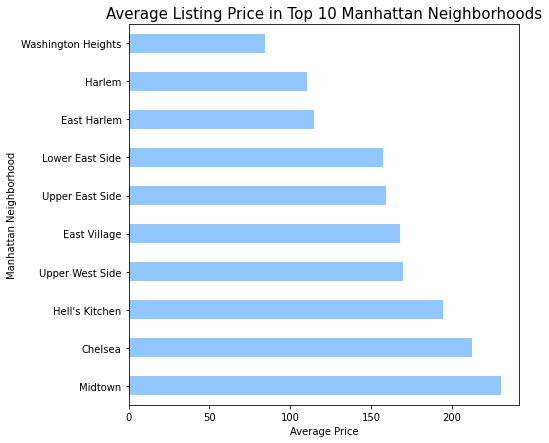

In [ ]:
fig,ax=plt.subplots()
top_manhattan_neighborhoods['Price'].plot.barh(figsize=(7,7), ax=ax)

ax.set_title('Average Listing Price in Top 10 Manhattan Neighborhoods',size=15)
ax.set_xlabel('Average Price')
ax.set_ylabel('Manhattan Neighborhood')

Of the 10 Manhattan neighborhoods with the most Airbnb listings, listings in Midtown have a substantially higher average price.

(0.0, 6.0)

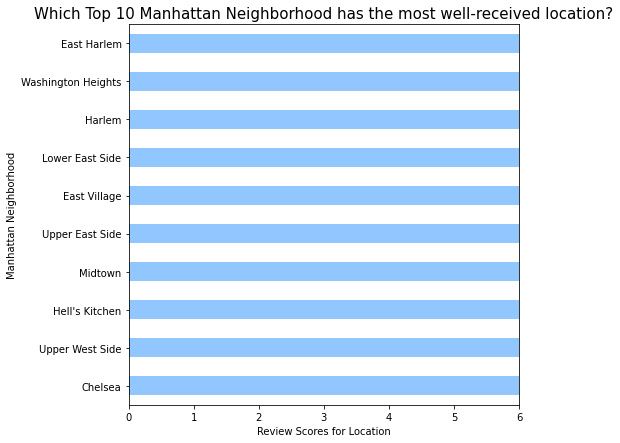

In [ ]:
fig,ax=plt.subplots()
top_manhattan_neighborhoods['Review Scores Location'].sort_values(ascending=False).plot.barh(figsize=(7,7), ax=ax)

ax.set_title('Which Top 10 Manhattan Neighborhood has the most well-received location?',size=15)
ax.set_xlabel('Review Scores for Location')
ax.set_ylabel('Manhattan Neighborhood')

ax.set_xlim(0,6)

(20.0, 125.0)

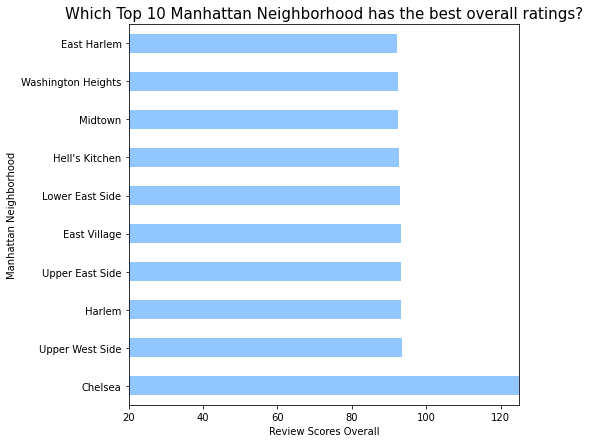

In [ ]:
fig,ax=plt.subplots()
top_manhattan_neighborhoods['Review Scores Rating'].sort_values(ascending=False).plot.barh(figsize=(7,7), ax=ax)

ax.set_title('Which Top 10 Manhattan Neighborhood has the best overall ratings?',size=15)
ax.set_xlabel('Review Scores Overall')
ax.set_ylabel('Manhattan Neighborhood')

ax.set_xlim(20,125)

Despite having on average the most expensive listings, Midtown has the worst reviews scores for its location and overall. Chelsea's overall review scores are significantly higher than the other common neighborhoods.

In [ ]:
all_manhattan_neighborhoods = manhattan.groupby('Neighbourhood cleansed')['Price','Review Scores Rating','Review Scores Location'].mean().sort_values('Price',ascending = False)
all_manhattan_neighborhoods

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Price,Review Scores Rating,Review Scores Location
Neighbourhood cleansed,,,
Flatiron District,280.814286,93.185714,9.900000
NoHo,256.308824,94.338235,9.970588
Tribeca,246.942308,93.807692,9.682692
SoHo,238.992780,93.841155,9.758123
Midtown,230.171533,92.559611,9.731144
West Village,226.041538,94.278462,9.884615
Greenwich Village,214.006309,93.473186,9.905363
Chelsea,212.780838,232.005988,9.837126
Theater District,209.751825,93.197080,9.824818


(50.0, 600.0)

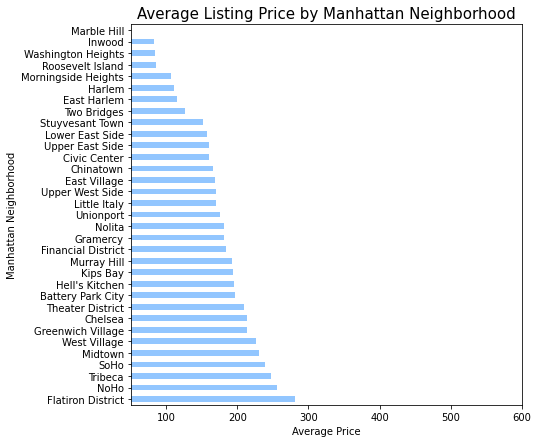

In [ ]:
fig,ax=plt.subplots()
all_manhattan_neighborhoods['Price'].plot.barh(figsize=(7,7), ax=ax)

ax.set_title('Average Listing Price by Manhattan Neighborhood',size=15)
ax.set_xlabel('Average Price')
ax.set_ylabel('Manhattan Neighborhood')

ax.set_xlim(50,600)

While Midtown is the most pricey of the most popular 10 neighborhoods for listing, the Theater District (with less than 500 listings vs over 2000 in Midtown) has by far the most expensive average listing.

(1.0, 10.0)

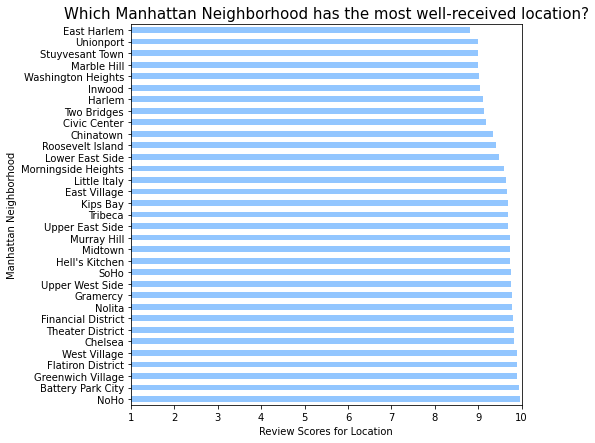

In [ ]:
fig,ax=plt.subplots()
all_manhattan_neighborhoods['Review Scores Location'].sort_values(ascending=False).plot.barh(figsize=(7,7), ax=ax)

ax.set_title('Which Manhattan Neighborhood has the most well-received location?',size=15)
ax.set_xlabel('Review Scores for Location')
ax.set_ylabel('Manhattan Neighborhood')

ax.set_xlim(1,10)

## Top Keywords

In [ ]:
keywords = []
keyword_count = []

def split_name(name):
    spl=str(name).split()
    return spl

for name in data.Name:
    keywords.append(name)

for x in keywords:
    for word in split_name(x):
        word=word.lower()
        keyword_count.append(word)

In [ ]:
from collections import Counter

#show most frequently used words by host to name their listing
top_keywords_count = Counter(keyword_count).most_common()
top_keywords = [x[0] for x in top_keywords_count[:100]]
text = ' '.join(top_keywords)
text

'in room bedroom private apartment cozy the to studio apt brooklyn spacious 1 2 with of and east & manhattan park sunny beautiful near - williamsburg village heart a large loft nyc central modern luxury from home new bright west bed for 1br charming one side upper midtown great location bushwick w/ quiet on br brownstone close harlem clean 3 square huge times + garden by amazing prime heights bath duplex min | subway 2br city big lovely house best renovated chelsea york view comfortable apt. space gorgeous bathroom entire comfy prospect suite train perfect mins floor hill place astoria'

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

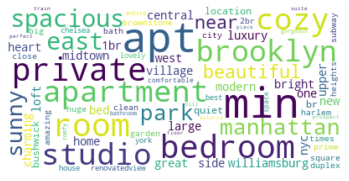

In [ ]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Regressions


Are more expensive listings more highly received?

In [ ]:
location = data.loc[data['Price'] <= 400][['latitude','longitude','Number of reviews','Price']]
location

,latitude,longitude,Number of reviews,Price
0,40.866889,-73.857756,66,43
1,40.829392,-73.865137,38,28
2,40.869139,-73.895096,18,80
3,40.868719,-73.891438,7,140
4,40.863628,-73.894787,56,60
...,...,...,...,...
75744,40.641480,-73.960730,0,22
75745,40.681430,-73.754610,0,50
75746,40.647210,-74.014180,0,45
75747,40.691970,-73.930030,0,20


Text(0.5, 1.0, 'Pricing of Listings in NYC')

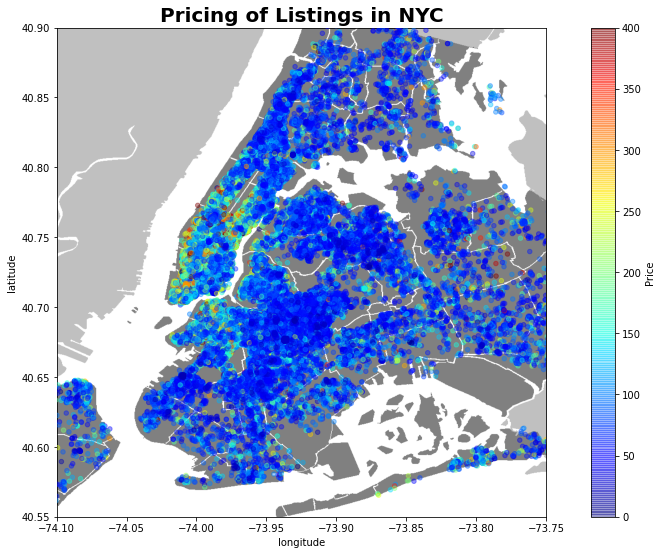

In [ ]:
import urllib

i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_map = plt.imread(i)
plt.figure(figsize=(16,9))

plt.imshow(nyc_map, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()

x = range(300)
ax.imshow(img, extent=[0, 400, 0, 300])

location.plot.scatter(ax=ax, figsize = (16,9), x='longitude',y='latitude', c='Price', cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

ax.set_xlim(-74.1,-73.75)
ax.set_ylim(40.55,40.9)
ax.set_title('Pricing of Listings in NYC', size=20, fontweight='bold')

In [ ]:
reviews = data[['Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','Reviews per month','Price']]

#drop extreme ratings where rating out of 100 was 0
reviews.drop(reviews.loc[reviews['Review Scores Rating']==0].index,inplace=True)
reviews

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Reviews per month,Price
0,96,10,9,10,10,9,10,1.77,43
1,89,10,9,9,10,9,9,1.54,28
2,90,9,9,10,9,9,9,3.83,80
3,85,9,10,8,9,9,9,0.67,140
4,95,10,10,10,10,9,10,3.70,60
...,...,...,...,...,...,...,...,...,...
44301,99,10,10,10,10,9,10,3.44,80
44303,95,9,9,10,10,9,10,0.40,150
44305,100,10,10,10,10,10,10,2.25,70
44306,98,10,10,10,10,10,10,4.76,95


In [314]:
reviews[['Review Scores Rating','Price']].corr()

,Review Scores Rating,Price
Review Scores Rating,1.000000,0.006254
Price,0.006254,1.000000


In [319]:
reviews[['Review Scores Accuracy','Price']].corr()

,Review Scores Accuracy,Price
Review Scores Accuracy,1.0000,0.0124
Price,0.0124,1.0000


In [318]:
reviews[['Review Scores Cleanliness','Price']].corr()

,Review Scores Cleanliness,Price
Review Scores Cleanliness,1.000000,0.065998
Price,0.065998,1.000000


In [317]:
reviews[['Review Scores Location','Price']].corr()

,Review Scores Location,Price
Review Scores Location,1.000000,0.131166
Price,0.131166,1.000000


The correlations between these review scor types and price are not substantal/strong.

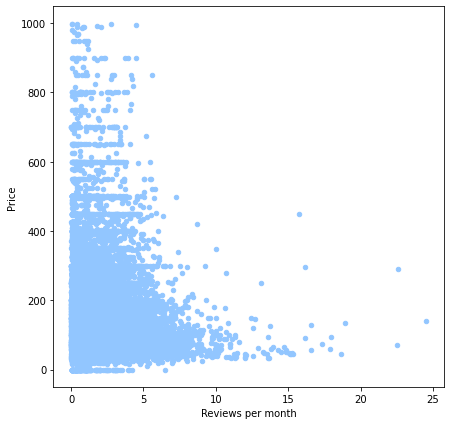

In [316]:
reviews.plot.scatter(x='Reviews per month', y='Price', figsize=(7,7)) #FIX

While many listings have very few reviews per month, the more popular listings (more reviews/month) are all on the cheaper end.

# ML Introduction
The purpose of this section will be to determine whether we can use machine learning to provide insights to Airbnb hosts about variables keen to their listings. We will examine which numeric dependent variables in the data set can be reliably determined using a KNN machine learning model. The reliability of the models will be demonstrated through value counts distributions, density plots, and various accuracy metrics. Both KNN Classifier and KNN Regressor versions of the models will be tested to determine the effectiveness of each on the different dependent variables.

The variables examined will be review scores rating, review scores accuracy, review scores cleanliness, review scores checkin, review scores communication, review scores location, review scores value, and price. These variables were deemed to be most important to Airbnb hosts regarding their listings.

The non-numeric columns of the data were excluded from the model as their current data types are non-compatible for execution, and the encoding of the non-numeric types was outside the breadth of the class instruction. 

For the purpose of runtime speed, the maximum number of n_neighbors for the KNN model was limited to 10. In tests that exceeded this number, the runtime had extended past 10 minutes per variable - totalling a runtime over 80 minutes for all of the dependent variables. Further, the incremental accuracy of n_neighbors past 10 seemed to be non-substantial or non-existent in all of the cases. For robustness, it would be recommended to increase the n_neighbors size, but for convenience/efficiency, not at all. 

Density plots were specifically chosen in order to detect overfitting of the model for any of the variables. Given that we are proceeding with a maximum number of n_neighbors on the smaller end, it is possible that the model could use an n_neighbors size of 1 to best fit and predict the data. Another benefit of the density plots is the ability to plot a curve of the data, which will show the skewness of the distribution and provide insight into both the data set and the model's decision making. Each variable contains three unique density plots: 1) a bar density histogram plotting the actual data 2) a bar density histogram plotting the classifier model predictions 3) a step density histogram plotting the regressor model predictions. The step density was used since the regressor model predictions are not required to be classified as A or B - they can be between A and B. 

In [54]:
# import relevant modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [55]:
# read in data set, intialize plot styling
df = pd.read_csv('NY_Listings.csv', encoding='Latin-1')
style.use('ggplot')
plt.rcParams.update({'font.size': 16})

# clean data of non-numeric columns (can't encode for ML section)
non_floats = []
for col in df:
    if df[col].dtypes not in ['float64','int64','bool']:
        non_floats.append(col)
        
df = df.drop(columns=non_floats)

# drop outliers from the data 
df = df.dropna()
df.drop(df.loc[df['Review Scores Rating']==38425].index, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (7,19,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


---------- Beginning of Review Scores Rating ----------



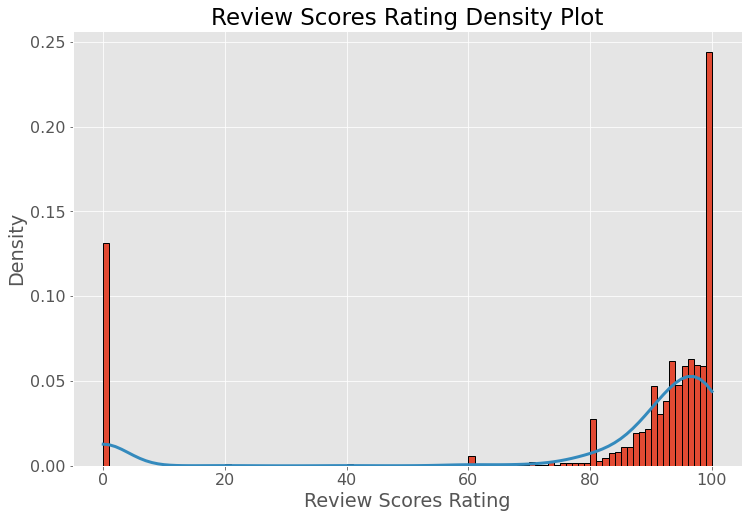

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


---------- Review Scores Rating KNN Model ----------

Model Best Params: {'n_neighbors': 10}
Model Best Score: 36.43471142038477

- Classifier -
Mean Squared Error: 45.212180746561884
Mean Absolute Error: 3.6254092992796334
Root Mean Squared Error: 6.724000352956704
R2: 0.9560347400620975
Metrics Accuracy: 34.82318271119843

- Regressor -
Mean Squared Error: 31.464392599869026
Mean Absolute Error: 3.2041093647675183
Root Mean Squared Error: 5.609313023879932
R2: 0.9694033736794117



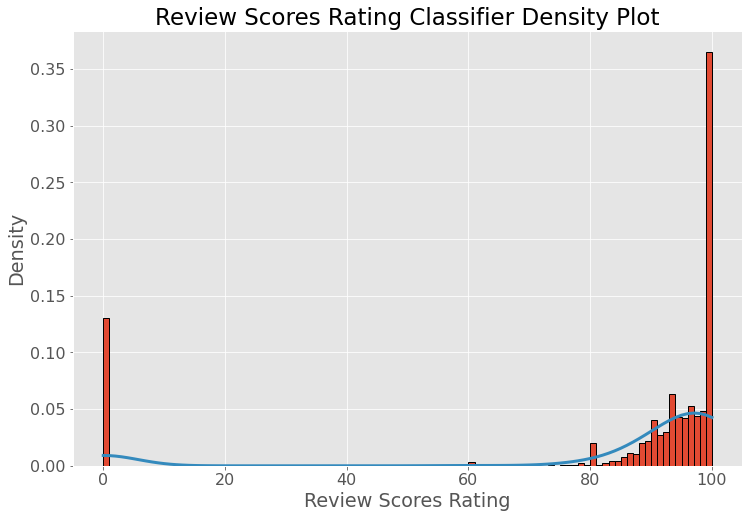

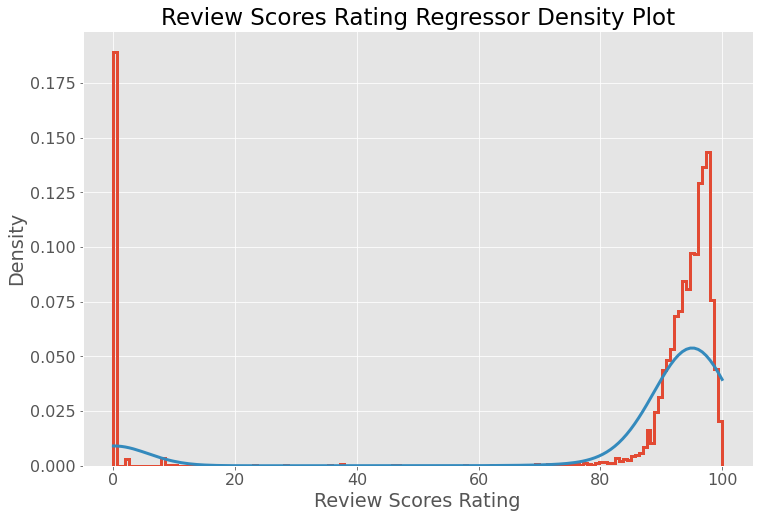

---------- End of Review Scores Rating ----------

---------- Beginning of Review Scores Accuracy ----------



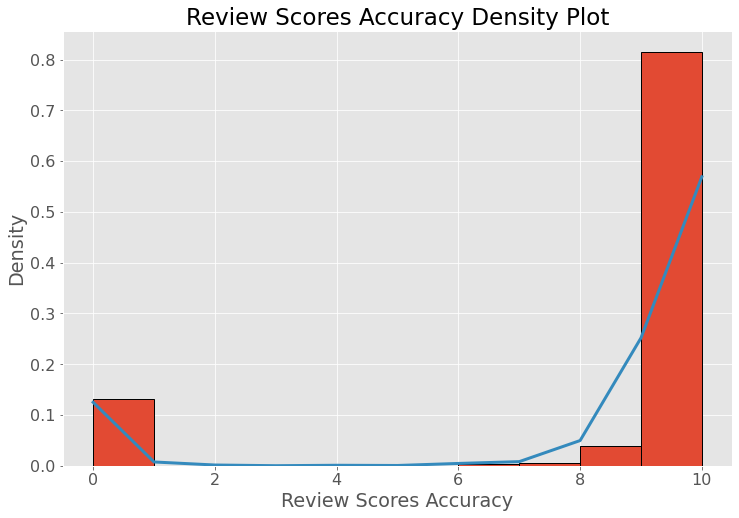

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


---------- Review Scores Accuracy KNN Model ----------

Model Best Params: {'n_neighbors': 9}
Model Best Score: 75.59148587801883

- Classifier -
Mean Squared Error: 0.47380484610347084
Mean Absolute Error: 0.28323510150622133
Root Mean Squared Error: 0.6883348357474514
R2: 0.9576922531219012
Metrics Accuracy: 76.34250163719712

- Regressor -
Mean Squared Error: 0.35181142723164116
Mean Absolute Error: 0.33649858109583053
Root Mean Squared Error: 0.5931369380097998
R2: 0.9685854863356791



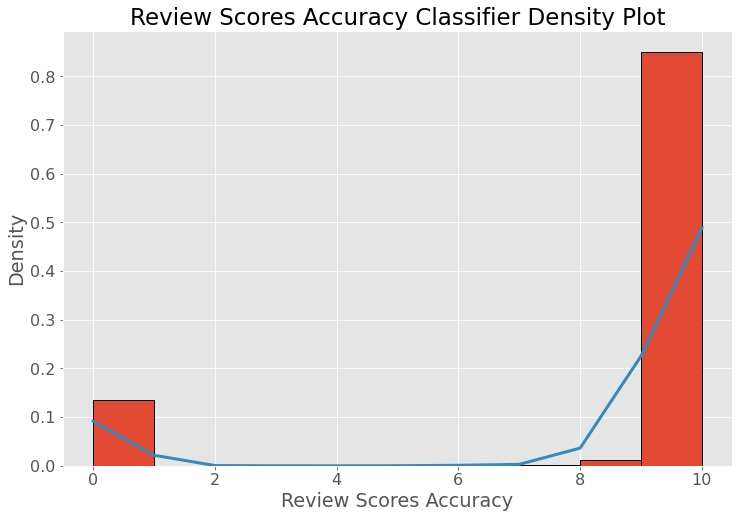

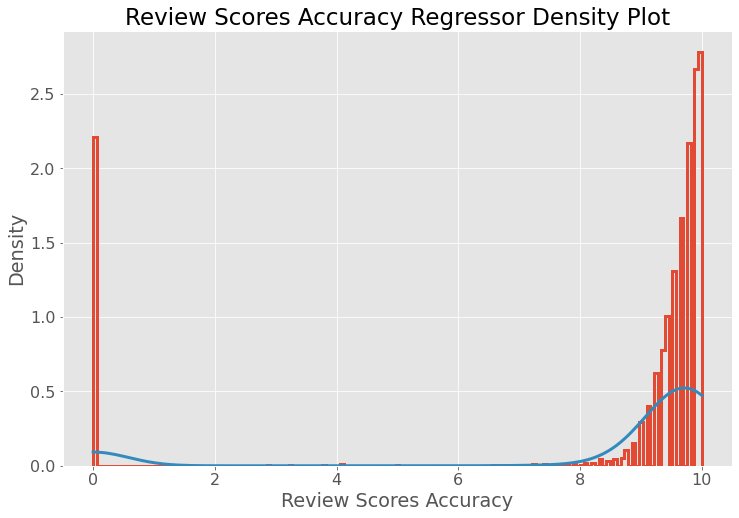

---------- End of Review Scores Accuracy ----------

---------- Beginning of Review Scores Cleanliness ----------



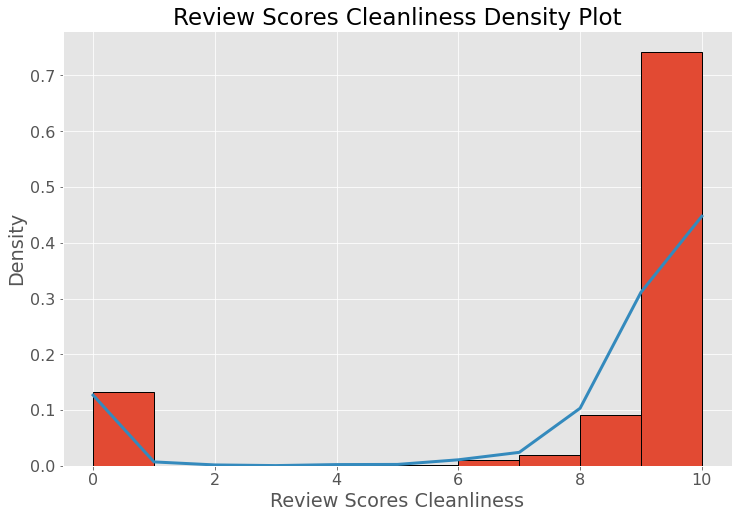

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


---------- Review Scores Cleanliness KNN Model ----------

Model Best Params: {'n_neighbors': 10}
Model Best Score: 63.39746213671715

- Classifier -
Mean Squared Error: 0.8115586116568435
Mean Absolute Error: 0.46414538310412573
Root Mean Squared Error: 0.9008654792236428
R2: 0.9258483859315502
Metrics Accuracy: 64.1290111329404

- Regressor -
Mean Squared Error: 0.6108104125736739
Mean Absolute Error: 0.5034872298624754
Root Mean Squared Error: 0.7815436088752015
R2: 0.9441906261216473



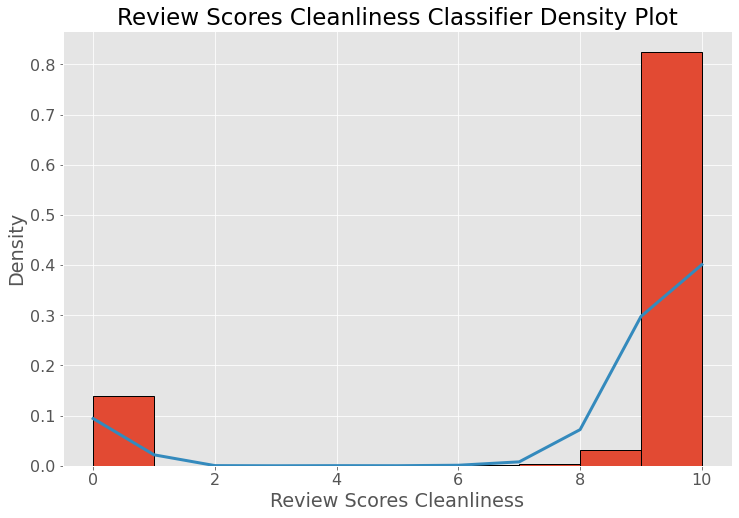

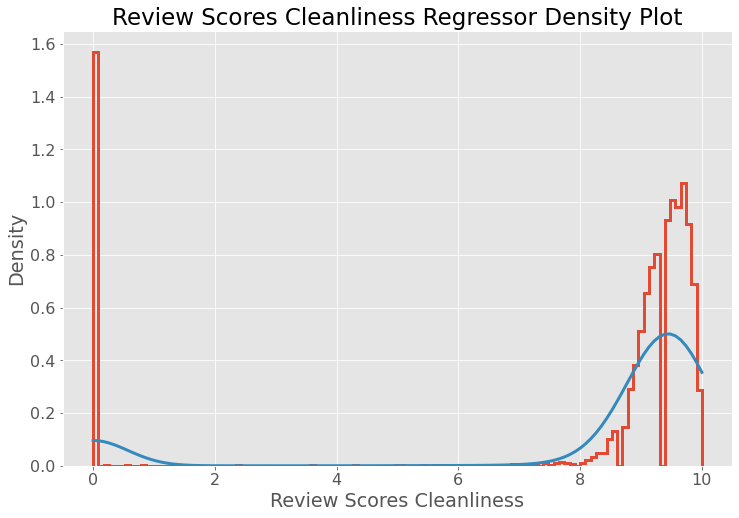

---------- End of Review Scores Cleanliness ----------

---------- Beginning of Review Scores Checkin ----------



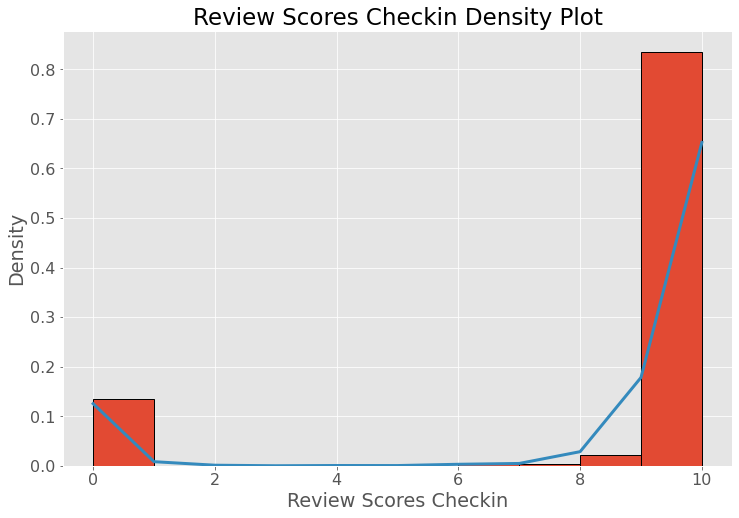

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


---------- Review Scores Checkin KNN Model ----------

Model Best Params: {'n_neighbors': 9}
Model Best Score: 83.19688907081458

- Classifier -
Mean Squared Error: 0.44138834315651604
Mean Absolute Error: 0.2154551407989522
Root Mean Squared Error: 0.6643706368861556
R2: 0.9617314388862159
Metrics Accuracy: 83.28421741977733

- Regressor -
Mean Squared Error: 0.3484056529788902
Mean Absolute Error: 0.2729207596594629
Root Mean Squared Error: 0.5902589711125873
R2: 0.9697930785211456



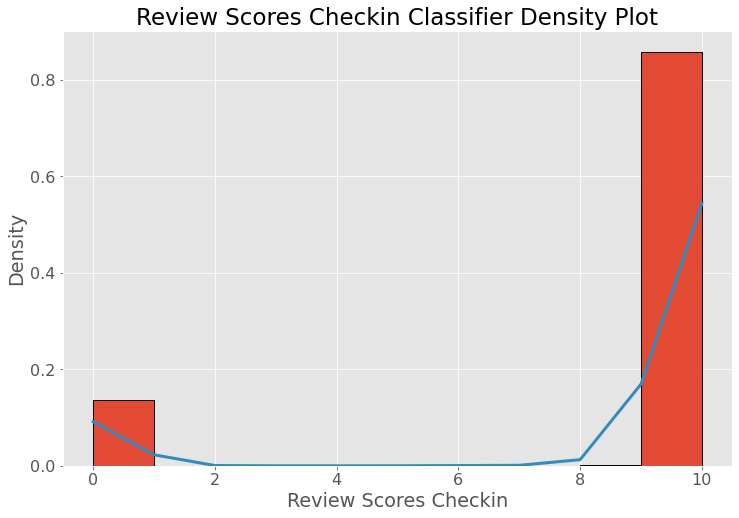

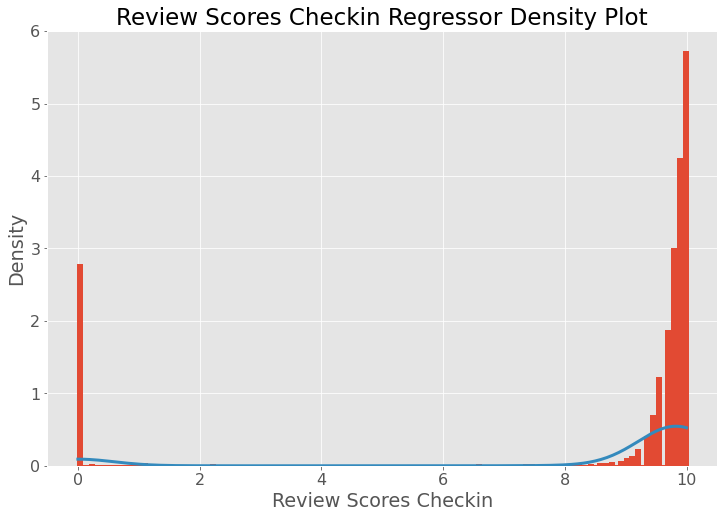

---------- End of Review Scores Checkin ----------

---------- Beginning of Review Scores Communication ----------



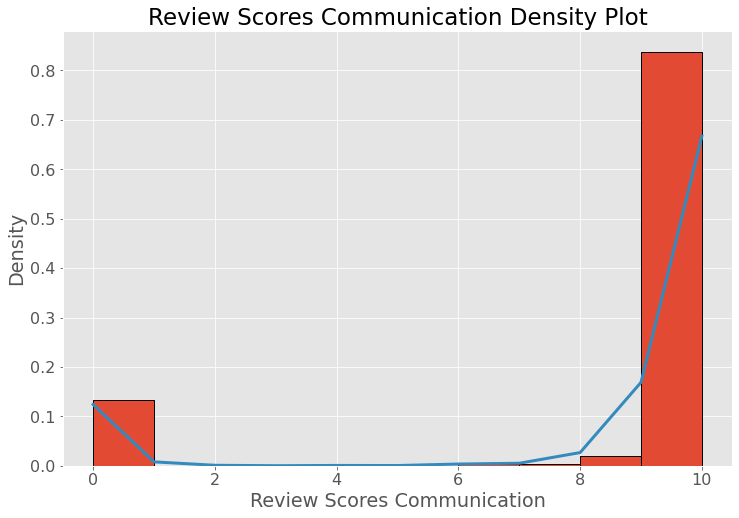

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


---------- Review Scores Communication KNN Model ----------

Model Best Params: {'n_neighbors': 7}
Model Best Score: 84.35530085959886

- Classifier -
Mean Squared Error: 0.4212508185985593
Mean Absolute Error: 0.20743287491814014
Root Mean Squared Error: 0.6490383799118195
R2: 0.9629491299492805
Metrics Accuracy: 83.46430910281597

- Regressor -
Mean Squared Error: 0.3120364059179664
Mean Absolute Error: 0.25278323510150624
Root Mean Squared Error: 0.5586021893243585
R2: 0.9725550199161093



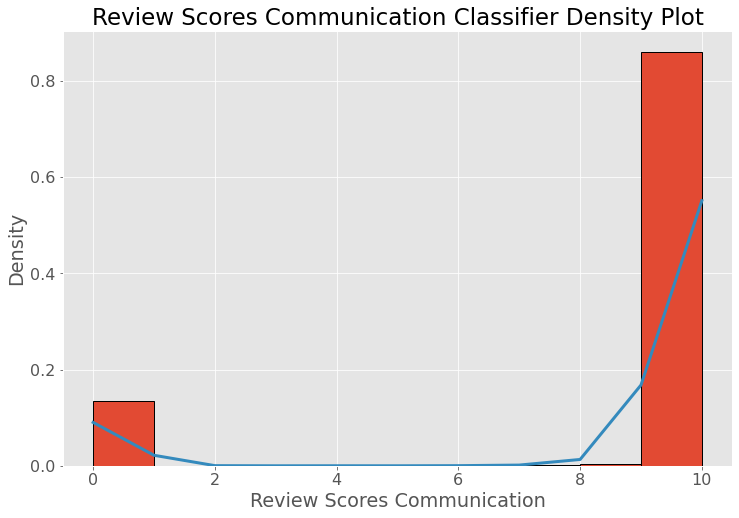

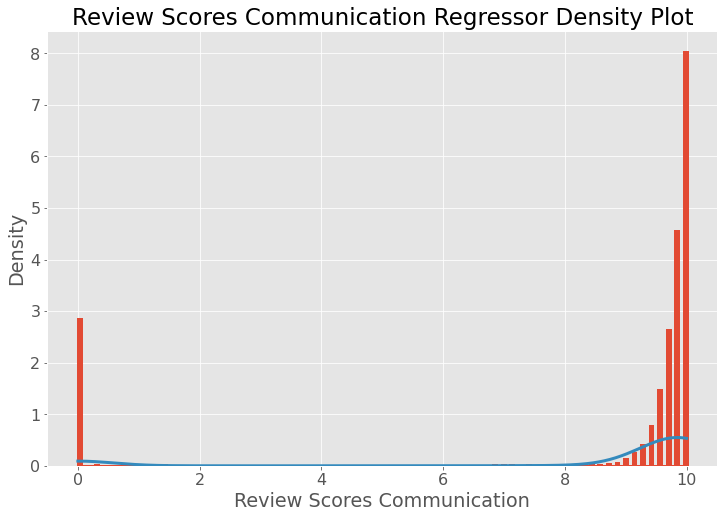

---------- End of Review Scores Communication ----------

---------- Beginning of Review Scores Location ----------



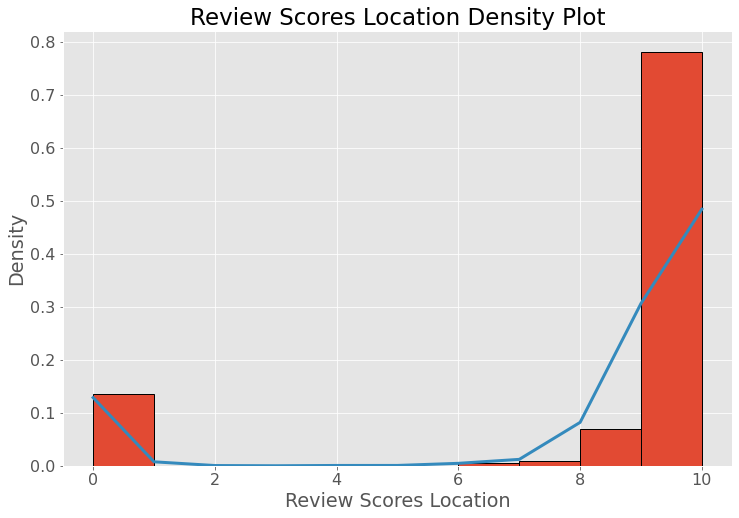

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


---------- Review Scores Location KNN Model ----------

Model Best Params: {'n_neighbors': 10}
Model Best Score: 70.54441260744986

- Classifier -
Mean Squared Error: 0.5985592665356909
Mean Absolute Error: 0.35494433529796987
Root Mean Squared Error: 0.77366612084005
R2: 0.9464804804552184
Metrics Accuracy: 70.48133595284872

- Regressor -
Mean Squared Error: 0.44739521938441396
Mean Absolute Error: 0.40420759659462996
Root Mean Squared Error: 0.6688760867189183
R2: 0.9599966477393793



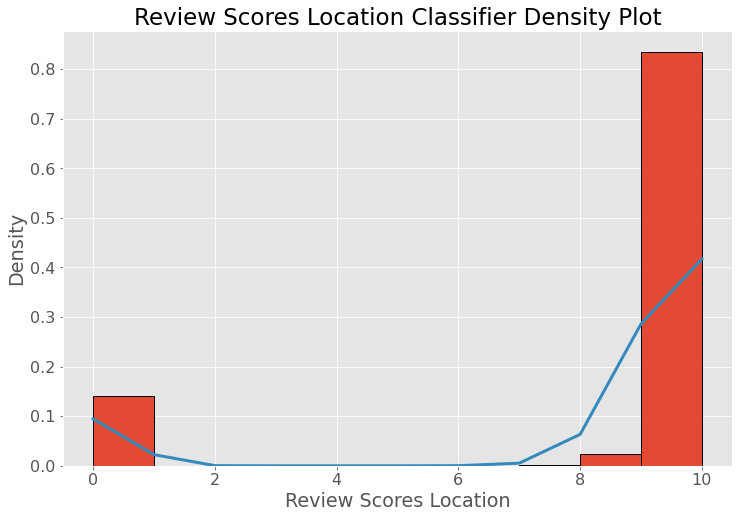

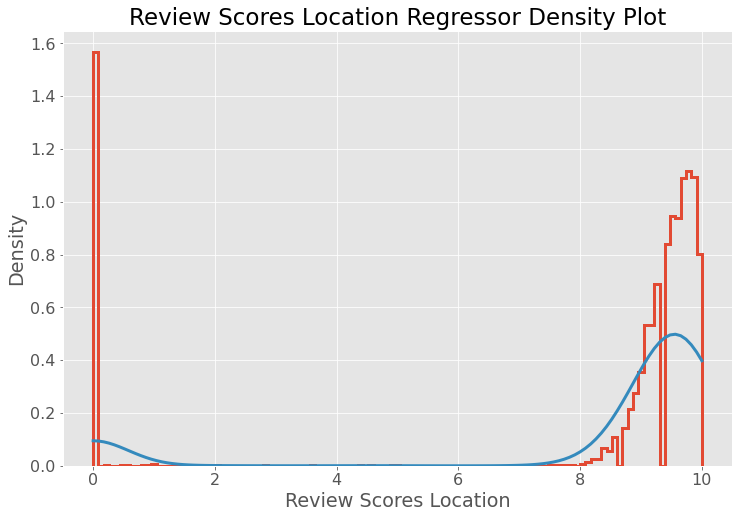

---------- End of Review Scores Location ----------

---------- Beginning of Review Scores Value ----------



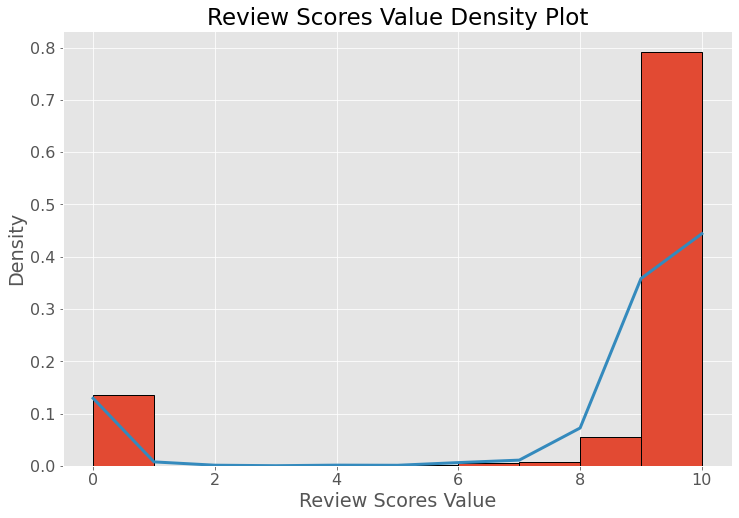

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


---------- Review Scores Value KNN Model ----------

Model Best Params: {'n_neighbors': 9}
Model Best Score: 70.26606631191157

- Classifier -
Mean Squared Error: 0.5383104125736738
Mean Absolute Error: 0.3578912901113294
Root Mean Squared Error: 0.7336964035441865
R2: 0.9494761002122212
Metrics Accuracy: 69.33529796987557

- Regressor -
Mean Squared Error: 0.4108637124354217
Mean Absolute Error: 0.40857163646947525
Root Mean Squared Error: 0.6409865150183908
R2: 0.9614377939778733



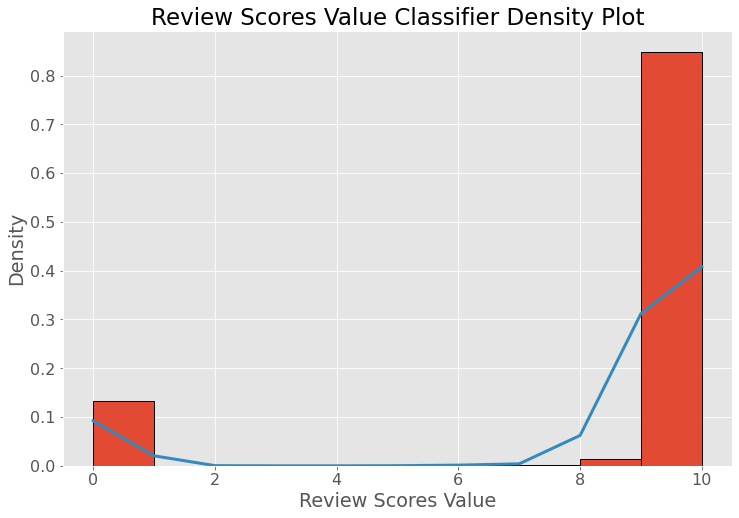

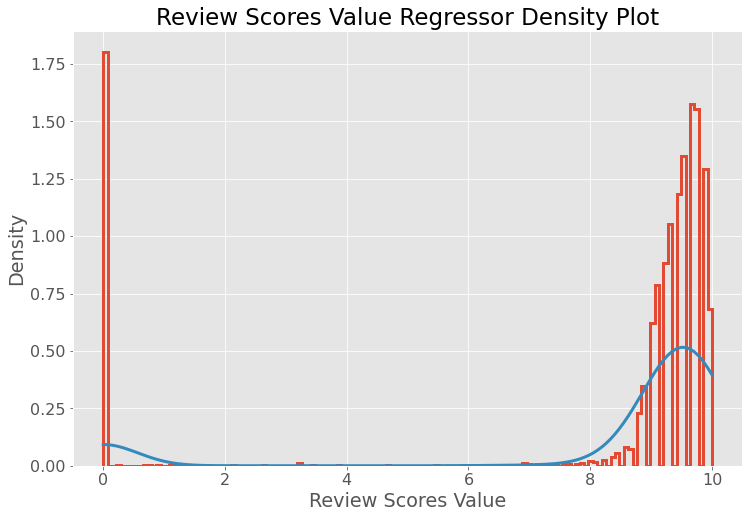

---------- End of Review Scores Value ----------

---------- Beginning of Price ----------



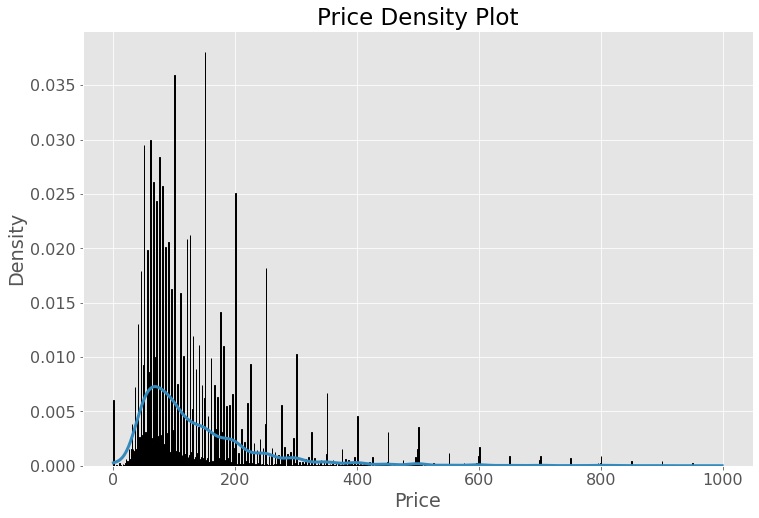

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


---------- Price KNN Model ----------

Model Best Params: {'n_neighbors': 1}
Model Best Score: 5.517805976258698

- Classifier -
Mean Squared Error: 10067.880320890636
Mean Absolute Error: 58.28536345776031
Root Mean Squared Error: 100.33882758379548
R2: 0.1765173208062064
Metrics Accuracy: 5.255402750491159

- Regressor -
Mean Squared Error: 10067.880320890636
Mean Absolute Error: 58.28536345776031
Root Mean Squared Error: 100.33882758379548
R2: 0.1765173208062064



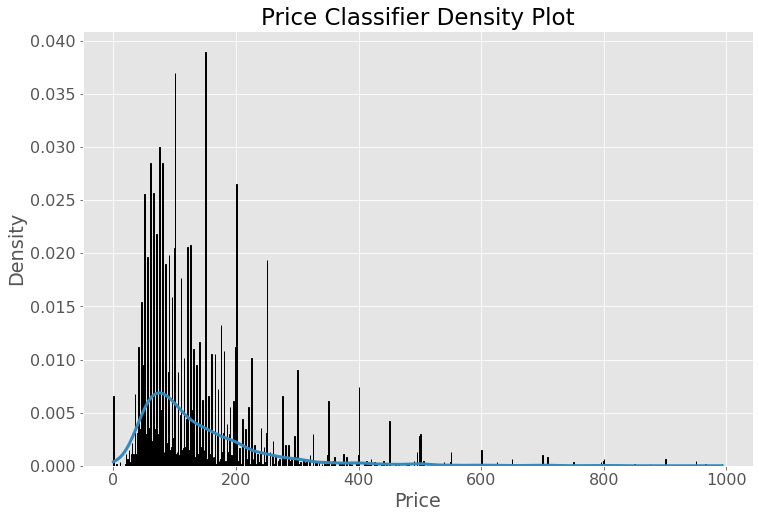

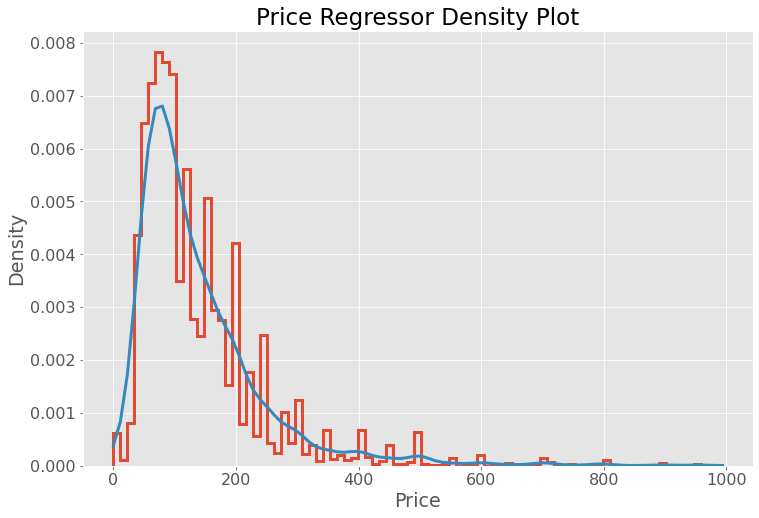

---------- End of Price ----------



In [56]:
# dependent variables to predict
preds = ['Review Scores Rating','Review Scores Accuracy','Review Scores Cleanliness',
         'Review Scores Checkin','Review Scores Communication','Review Scores Location',
        'Review Scores Value','Price']

# loop through variables for predictions
for pred in preds:
    
    # display percentages of values for the data
    print('---------- Beginning of',pred,'----------', end='\n\n')
    #print(df[pred].value_counts(normalize=True).sort_index(ascending=False)*100,end='\n\n')
    
    # display density plot of the values for the data
    fig = plt.figure(figsize=(12,8))
    noise = df[pred]
    density = stats.gaussian_kde(noise)
    n, x, _ = plt.hist(noise, bins=range(min(noise), max(noise) + 1, 1), histtype='bar', density=True, linewidth=1, edgecolor='k')
    plt.xlabel(pred)
    plt.ylabel('Density')
    plt.title(pred+' Density Plot')
    plt.plot(x, density(x), linewidth=3)
    plt.show()
    
    # drop the variable to predict for train test split initializtion
    x = df.drop(pred, axis=1)
    y = df[pred]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20)
    
    # scale the data
    scaler = StandardScaler()
    scaler.fit(x_train)
    x_train = scaler.transform(x_train)
    x_test = scaler.transform(x_test)
    
    # set parameters and initialize KNN
    params = {'n_neighbors': np.arange(1, 11)}
    knn = KNeighborsClassifier()
    
    # determine the best number of n_neighbors using GridSearchCV
    model = GridSearchCV(knn, params, cv=10, scoring='accuracy')
    model.fit(x_train,y_train)
    print('----------',pred+' KNN Model','----------')
    print('\nModel Best Params:', model.best_params_)
    print('Model Best Score:', model.best_score_*100)
    
    # use the ideal parameters to fit the training data and make predictions
    best_knn = KNeighborsClassifier(n_neighbors=model.best_params_['n_neighbors'])
    best_knn.fit(x_train, y_train)
    y_pred = best_knn.predict(x_test)
    vals = pd.Series(y_pred)
    
    best_reg = KNeighborsRegressor(n_neighbors=model.best_params_['n_neighbors'])
    best_reg.fit(x_train, y_train)
    reg_pred = best_reg.predict(x_test)
    reg_vals = pd.Series(reg_pred)
    
    # summarize results
    #print(vals.value_counts(normalize=True).sort_index(ascending=False)*100)
    print('\n- Classifier -')
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R2:', metrics.r2_score(y_test, y_pred))
    print('Metrics Accuracy:', accuracy_score(y_pred,y_test)*100)
    
    print('\n- Regressor -')
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, reg_pred))  
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, reg_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, reg_pred)))
    print('R2:', metrics.r2_score(y_test, reg_pred), end='\n\n')
    
    # plot results in a density plot
    fig = plt.figure(figsize=(12,8))
    noise = vals
    density = stats.gaussian_kde(noise)
    n, x, _ = plt.hist(noise, bins=range(min(noise), max(noise) + 1, 1), histtype='bar', density=True, linewidth=1, edgecolor='k')
    plt.xlabel(pred)
    plt.ylabel('Density')
    plt.title(pred+' Classifier Density Plot')
    plt.plot(x, density(x), linewidth=3)
    plt.show()
    
    fig = plt.figure(figsize=(12,8))
    noise = reg_vals
    density = stats.gaussian_kde(noise)
    n, x, _ = plt.hist(noise, bins='auto', histtype=u'step', density=True, linewidth=3) 
    plt.xlabel(pred)
    plt.ylabel('Density')
    plt.title(pred+' Regressor Density Plot')
    plt.plot(x, density(x), linewidth=3)
    plt.show()
    print('---------- End of',pred,'----------', end='\n\n')

---------- Testing Price with Larger N_Neighbors Value ----------

- Classifier -
Mean Squared Error: 9580.503929273085
Mean Absolute Error: 54.73117223313687
Root Mean Squared Error: 97.88004867833426
R2: 0.28502768426888936
Metrics Accuracy: 5.697445972495088

- Regressor -
Mean Squared Error: 6502.077484915958
Mean Absolute Error: 49.43537218947827
Root Mean Squared Error: 80.63546046818334
R2: 0.5147640008529067



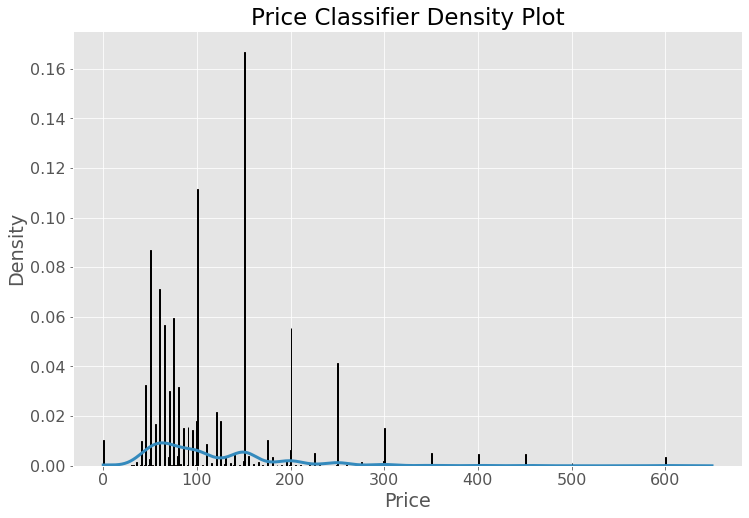

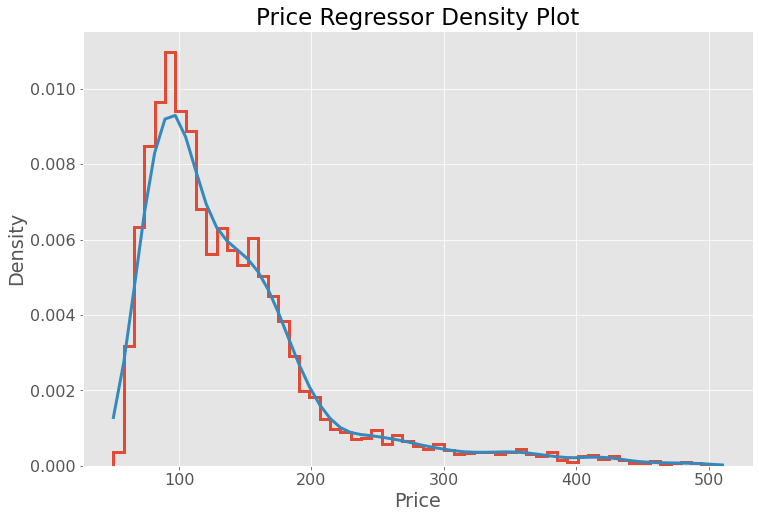

In [59]:
# test price with non-overfitting n_neighbors value
print('---------- Testing Price with Larger N_Neighbors Value ----------')
# drop the variable to predict for train test split initializtion
x = df.drop('Price', axis=1)
y = df['Price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20)
    
# scale the data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
    
# use the ideal parameters to fit the training data and make predictions
best_knn = KNeighborsClassifier(n_neighbors=75)
best_knn.fit(x_train, y_train)
y_pred = best_knn.predict(x_test)
vals = pd.Series(y_pred)

best_reg = KNeighborsRegressor(n_neighbors=75)
best_reg.fit(x_train, y_train)
reg_pred = best_reg.predict(x_test)
reg_vals = pd.Series(reg_pred)

# summarize results
print('\n- Classifier -')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))
print('Metrics Accuracy:', accuracy_score(y_pred,y_test)*100)
    
print('\n- Regressor -')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, reg_pred))  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, reg_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, reg_pred)))
print('R2:', metrics.r2_score(y_test, reg_pred), end='\n\n')

# plot results in a density plot
fig = plt.figure(figsize=(12,8))
noise = vals
density = stats.gaussian_kde(noise)
n, x, _ = plt.hist(noise, bins=range(min(noise), max(noise) + 1, 1), histtype='bar', density=True, linewidth=1, edgecolor='k')
plt.xlabel(pred)
plt.ylabel('Density')
plt.title(pred+' Classifier Density Plot')
plt.plot(x, density(x), linewidth=3)
plt.show()

fig = plt.figure(figsize=(12,8))
noise = reg_vals
density = stats.gaussian_kde(noise)
n, x, _ = plt.hist(noise, bins='auto', histtype=u'step', density=True, linewidth=3) 
plt.xlabel(pred)
plt.ylabel('Density')
plt.title(pred+' Regressor Density Plot')
plt.plot(x, density(x), linewidth=3)
plt.show()

---------- Testing Price with Logistic Model ----------


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model Score: 4.082434615552548
Metrics Accuracy: 4.191224623444663



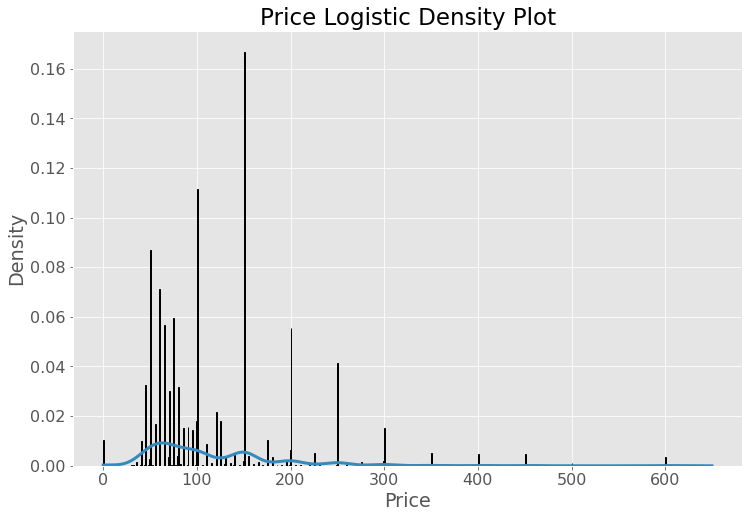

In [61]:
# test price for logistic regression fit
print('---------- Testing Price with Logistic Model ----------', end='\n')
from sklearn.linear_model import LogisticRegression

# drop dependent variable
x = df.drop('Price', axis=1)
y = df['Price']

# intialize test_train_split and logistic regression
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4)
logistic_regression = LogisticRegression()

# fit and predict the data using the trains
logistic_regression.fit(x_train, y_train)
print('Model Score:',logistic_regression.score(x_train, y_train)*100)
y_pred = logistic_regression.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)*100
print('Metrics Accuracy:',accuracy, end='\n\n')

# plot results in a density plot
fig = plt.figure(figsize=(12,8))
noise = vals
density = stats.gaussian_kde(noise)
n, x, _ = plt.hist(noise, bins=range(min(noise), max(noise) + 1, 1), histtype='bar', density=True, linewidth=1, edgecolor='k') 
plt.xlabel(pred)
plt.ylabel('Density')
plt.title(pred+' Logistic Density Plot')
plt.plot(x, density(x), linewidth=3)
plt.show()

# ML Conclusion
Overall, what we observed was that the KNN model was best able to predict data with a higher density in a condensed location (i.e. stronger skew to left or right sides), and data that had fewer predictable values. 

For example, the KNN model on price was overfitted - the model chose to use an n_neighbors value of 1. As displayed by the density plot, the model tried to copy the distribution makeup rather than being able to accurately make predictions. However, as price has over 1000 potential values, the model struggled to make overall accurate predictions. 

The review scores rating variable plots encountered a similar issue, though the model accuracy was much better given that it only had to predict using a potential 100 values rather than 1000. Further, the regressor version of the review scores rating model was able to significantly improve upon the accuracy of the classifier model, lowering mean squared error from 43.8 to 31.4. This resulted in over a full percentage point increase in the R^2 value of the model. We saw the same effect when we manually increased the n_neighbors to values such as 30 or 75 for the price variable to avoid overfitting. The accuracy of the models both improved compared to the overfit model with an n_neighbor value of 1. Between the 75 n_neighbor classifier and regressor plots, this improvement became more dramatic. The regressor version lowered mean squared error to 5911 and increased R^2 to 52%, compared to 9435 and 23% respectively for the classifier version. The necessity of a higher n_neighbor value was only reinforced by the fact that the price variable poorly fit under a logistic regression model. Thus, the KNN Regressor model for price with n_neighbors larger than 10 provided the best final result. 

The review scores checkin and review scores communication variables had the highest model accuracy at approximately 85% each (which the regressor version actually improved upon). What we observe from these plots is that they are very skewed to either 0 or 10 values. These plots, of all other variables, have the least amount (or smallest %) of potential values in the data value distributions. Thus, the KNN model was able to essentially ignore most of the values between 0 and 10 (excluding maybe 8 or 9) when trying to make a prediction using the training sets.

Aside from the number of potential values, all of the review scores models were more effective than that of the price likely due to user response bias. With the review scores, as displayed by the plots, users tend to give scores of either 0 or 10. This is because the actual action of giving a rating is somewhat impulsive. Users may classify their experiences as either positive or negative, not thinking into the gray area between - trying to figure out a true balance of the positive and negtive factors. Thus, the 0 score is frequently used to represent a negative experience - regardless of how negative - and the 10 score vice versa. All the KNN model then has to do is classify whether or not the data provided would lead to a more negative or more positive experience, as then likely assign a 0 or 10 score (possibly delegating an 8 or 9 score for more neutral indicators). 

The price variable, on the other hand, is not determined by user feedback. Instead, the hosts set the prices. Given that this price impacts the hosts' incomes, it is likely broken down into much further thought compared to, for example, a cleanliness score. As a result, as seen in the plots, we saw that price had a much larger range of potential values and a less skewed distribution. Although the price distribution is right-skewed, it is not skewed to a potential one or two values like that of the review scores plots. Contrarily, there is a price range of about 300 different values that encompass the right skew. Therfore, it becomes much more difficult for the KNN model to differntiate between the factors that lead to a 225 price versus a 235 price. This is the cause of the overfitting in the original model. However, for these more complex variables, the regressor versions were able to provide much more accurate and useful results as the KNN did not have to try and differentiate between price classification in the scenario above. Rather, it had to determine what was a reasonable regression trend between the prices and map it out. This was much more effective when the total number of potential values were larger and the incremental difference between the values smaller.

To summarize, I would recommend that Airbnb hosts use a KNN Regressor model for predicting dependent variables such as price and review scores rating which are more complex, less skewed, and distributions with more total value possibilities. For these more complex cases, I would make sure to check that the n_neighbors value is sufficiently large to rule out possiblity of overfitting and check the accuracy in a different model (ex. Logistic), such as we did with the price variable. On the other hand, I would recommend using a KNN Classifier model for predicting dependent variables such as review scores checkin and review scores communication which are less complex, more skewed, and distributions with fewer total value possibilties. With these combinations of KNN model types, we were able to effectively and fairly accurately make predictions based on the training data, which should be of great use to Airbnb hosts trying to determine how to improve their review scores ratings or setting a fair price for their listings.